## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_mousedata = pd.merge(mouse_metadata, study_results, how = "left", on=["Mouse ID"])
merge_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumorvol = merge_mousedata.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumorvol = merge_mousedata.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumorvol = merge_mousedata.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumorvol = merge_mousedata.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumorvol = merge_mousedata.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [3]:
tumorstats_regimen = pd.DataFrame ({"Mean Tumor Volume": mean_tumorvol,
                                   "Median Tumor Volume": median_tumorvol,
                                   "Tumor Volume Variance": var_tumorvol,
                                   "Tumor Volume Std. Dev.": std_tumorvol,
                                   "Tumor Volume Std. Err.": sem_tumorvol})
tumorstats_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
observations = merge_mousedata.groupby("Drug Regimen")
count_obs = observations["Drug Regimen"].count()
count_obs

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Observations by Drug Regimen')

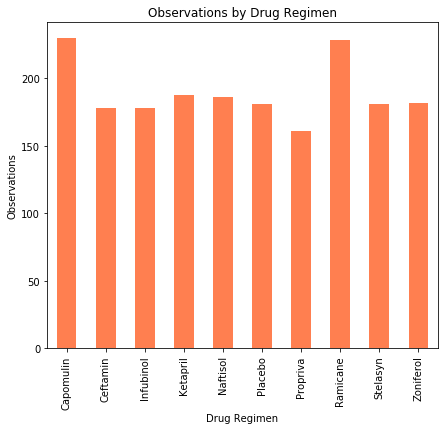

In [5]:
obs_chart = count_obs.plot(kind='bar', figsize = (7,6), color="coral", rot=90)
obs_chart.set_ylabel('Observations')
obs_chart.set_title("Observations by Drug Regimen")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

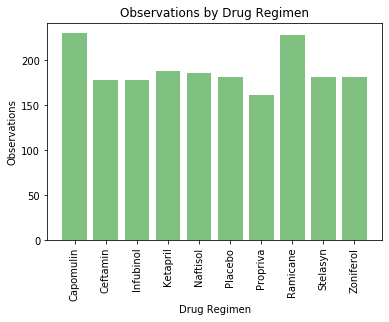

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(count_obs))

plt.bar(x_axis, count_obs, color='g', alpha=0.5, align= 'center')
plt.title("Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel ("Observations")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 
                'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 
                'Stelasyn', 'Zoniferol'])
degrees = 90
plt.xticks(rotation=degrees)

## Pie plots

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grp = merge_mousedata.groupby("Sex")
mice_gender = gender_grp["Sex"].count()
mice_gender

Sex
Female    935
Male      958
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Mice Gender')

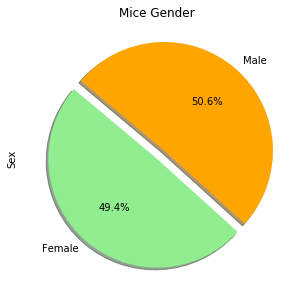

In [8]:
mice_gender_chart = mice_gender.plot(kind='pie', figsize = (5,5), colors=["lightgreen","orange"], autopct='%1.1f%%',explode= (0, 0.1), shadow = True, startangle =140)
mice_gender_chart.set_title("Mice Gender")

Text(0.5, 1.0, 'Mice Gender')

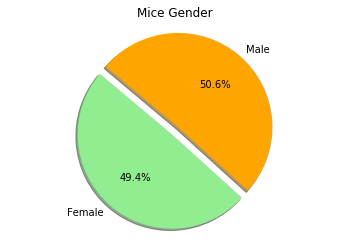

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [935, 958]
colors = ["lightgreen", "orange"]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct="%1.1f%%", shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Mice Gender")

## Quartiles, outliers and boxplots

In [44]:
max_tumor = merge_mousedata.groupby(['Mouse ID']).max()['Timepoint']
max_tumor = max_tumor.reset_index()
merge_data =  max_tumor[['Mouse ID', 'Timepoint']].merge(merge_mousedata, on= ['Mouse ID', 'Timepoint'], how = 'left')
max_tumor

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_maxvol = merge_data.loc[merge_data["Drug Regimen"]=="Capomulin",:]['Tumor Volume (mm3)']
ramicane_maxvol = merge_data.loc[merge_data["Drug Regimen"]=="Ramicane",:]['Tumor Volume (mm3)']                              
infubinol_maxvol = merge_data.loc[merge_data["Drug Regimen"]=="Infubinol",:]['Tumor Volume (mm3)']                                      
ceftamin_maxvol = merge_data.loc[merge_data["Drug Regimen"]=="Ceftamin",:]['Tumor Volume (mm3)']

In [14]:
quartiles = capomulin_maxvol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f'The lower quartile of final tumor volume is: {lowerq}')
print(f'The upper quartile of final tumor volume is: {upperq}')
print(f'The interquartile range of final tumor volume is: {iqr}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')

#outlier_capomulin  = capomulin_maxvol.where((capomulin_maxvol > lower_bound) & (capomulin_maxvol < upper_bound)).dropna() 


The lower quartile of final tumor volume is: 32.37735684
The upper quartile of final tumor volume is: 40.1592203
The interquartile range of final tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
quartiles = ramicane_maxvol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f'The lower quartile of final tumor volume is: {lowerq}')
print(f'The upper quartile of final tumor volume is: {upperq}')
print(f'The interquartile range of final tumor volume is: {iqr}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')

The lower quartile of final tumor volume is: 31.56046955
The upper quartile of final tumor volume is: 40.65900627
The interquartile range of final tumor volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [16]:
quartiles = infubinol_maxvol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f'The lower quartile of final tumor volume is: {lowerq}')
print(f'The upper quartile of final tumor volume is: {upperq}')
print(f'The interquartile range of final tumor volume is: {iqr}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')

The lower quartile of final tumor volume is: 54.04860769
The upper quartile of final tumor volume is: 65.52574285
The interquartile range of final tumor volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
quartiles = ceftamin_maxvol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f'The lower quartile of final tumor volume is: {lowerq}')
print(f'The upper quartile of final tumor volume is: {upperq}')
print(f'The interquartile range of final tumor volume is: {iqr}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')

The lower quartile of final tumor volume is: 48.72207785
The upper quartile of final tumor volume is: 64.29983003
The interquartile range of final tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


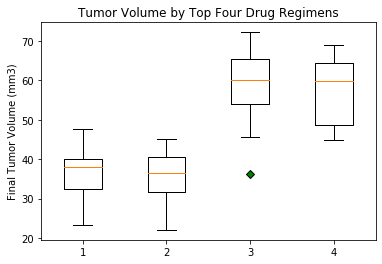

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Top Four Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
green_diamond = dict(markerfacecolor='g', marker = 'D')
ax1.boxplot([capomulin_maxvol, ramicane_maxvol, infubinol_maxvol, ceftamin_maxvol], flierprops=green_diamond)
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 'Mouse ID M601 Tumor Volume by Timepoint')

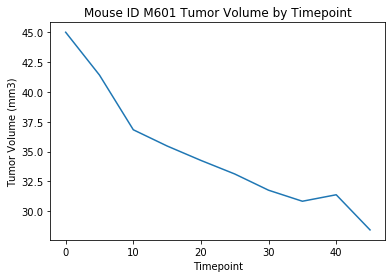

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = np.arange(0, 50, 5)
y_axis = merge_mousedata.loc[merge_mousedata["Mouse ID"]=="m601", :]["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint") 
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID M601 Tumor Volume by Timepoint")

Text(0, 0.5, 'Average Tumor Weight')

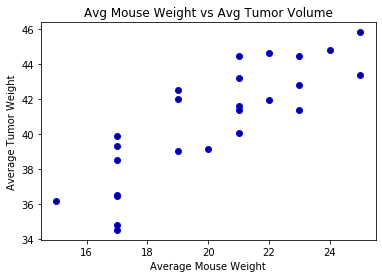

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_capomulin = merge_mousedata.loc[(merge_mousedata["Drug Regimen"]=="Capomulin"),:]
avg_mouse_data = mouse_capomulin.groupby(["Mouse ID"]).mean()['Weight (g)']

avg_tumor_vol= mouse_capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

plt.scatter(avg_mouse_data, avg_tumor_vol, marker = 'o', facecolors = 'navy', edgecolors = 'b')

plt.title("Avg Mouse Weight vs Avg Tumor Volume")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Weight")

The correlation between both factors is 0.84


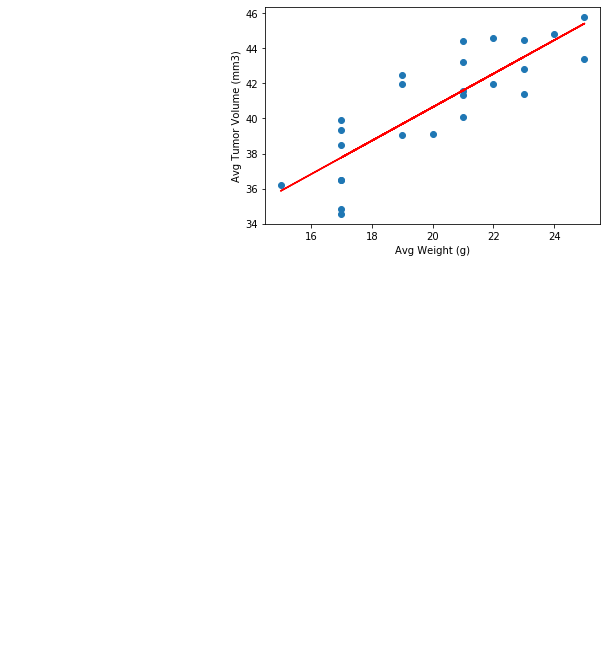

In [38]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_mouse_data
y_values = avg_tumor_vol
correlation = st.pearsonr(avg_mouse_data, avg_tumor_vol)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue,stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = 'red')
plt.xlabel('Avg Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()